In [1]:
from sentence_transformers import SentenceTransformer

In [2]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [3]:
import multimodalModel

In [4]:
path = '..\\data\\clean\\des_b64_wit_kag_0_of_48.tsv'

In [5]:
embedding_model = SentenceTransformer("clip-ViT-B-32")

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [19]:
model = multimodalModel.MultimodalModel(path, embedding_model)

In [20]:
model.compute_embeddings()

100%|██████████| 18/18 [00:16<00:00,  1.12it/s]


In [21]:
model.fit()

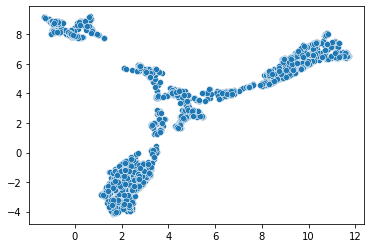

In [22]:
model.plot_embedding()

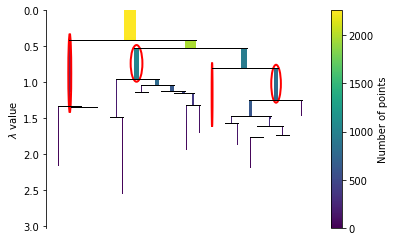

In [23]:
model.plot_clusters()

In [24]:
model.compute_c_tf_idf()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 16220/16220 [00:00<00:00, 141046.10it/s]


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\ipyplot\_utils.py:95: FutureWarning:

The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.




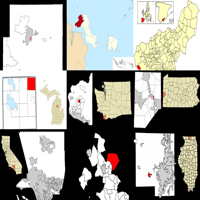
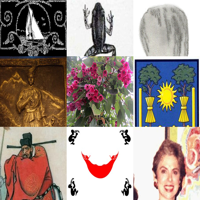
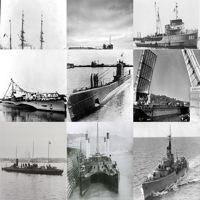
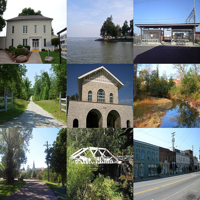


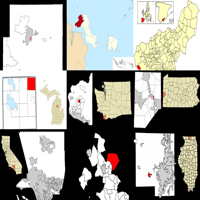
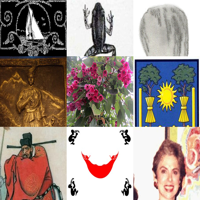
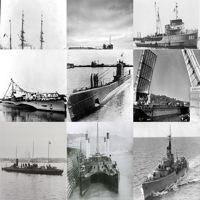
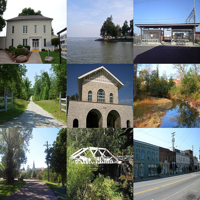

In [25]:
model.find_image_represenatives()
model.plot_images()


In [26]:
model.classes[0]

{'vocab': {'diplomats',
  'gated',
  'suite',
  'proteins',
  'monitored',
  'twentyseven',
  'official',
  'caballeros',
  'howard',
  'chartism',
  'rename',
  'reports',
  'diseases',
  'codes',
  'water',
  'sent',
  'bomaderry',
  'continues',
  'types',
  'daniel',
  'nelson',
  'opposite',
  'tokyo',
  'charleston',
  'encountered',
  'moldavia',
  'plopu',
  'encodes',
  'pius',
  'italy',
  'stockton',
  'enigmatic',
  'crownland',
  'office',
  'southcentral',
  'nestled',
  'formidable',
  'carolina',
  'displays',
  'escanaba',
  'bordentown',
  'introduced',
  'river',
  'fgeel',
  'satellite',
  'dallas',
  'thirtyone',
  'montane',
  'pasco',
  'wakarusa',
  'sr',
  'nynjctpa',
  'burst',
  'suffolk',
  'jewish',
  'mount',
  'designating',
  'trains',
  'shelf',
  'vuosaari',
  'believed',
  'procyonidae',
  'makham',
  'applications',
  'proposal',
  'derives',
  'triumph',
  'hen',
  'braganamiranda',
  'km',
  'combine',
  'bat',
  'members',
  'across',
  'surrounde

In [27]:
probs = model.clusterer.probabilities_

In [35]:
sum(probs)

2183.0761281668606

In [50]:
import image_exemplars
import random

In [38]:
exemplars = image_exemplars._extract_exemplars(model.clusterer, model.clusterer.labels_)

In [ ]:
exemplars

In [62]:
def sample_texts_from_exemplars(exemplars, texts, labels,num=3):
    chosen_texts = {}
    cluster_labels = sorted(list(set(labels)))
    for label in cluster_labels[1:]:
        indices = exemplars[label]['Indices']
        selected_indices_for_label = random.choices(indices, k=num)
        texts_for_label = [texts[index] for index in selected_indices_for_label]
        chosen_texts[label] = texts_for_label
    
    return chosen_texts

In [63]:
texts = sample_texts_from_exemplars(exemplars, model.texts, model.clusterer.labels_)

In [64]:
texts

{0: ['Menominee is a city in the Upper Peninsula of the U.S. state of Michigan. The population was 8,599 at the 2010 census. It is the county seat of Menominee County. Menominee is the fourth-largest city in the Upper Peninsula, behind Marquette, Sault Ste. Marie, and Escanaba. Menominee Township is located to the north of the city, but is politically autonomous.',
  'Raua is a subdistrict in the district of Kesklinn, Tallinn, the capital of Estonia. It has a population of 5,654.',
  'Saint Lucia is a sovereign island country in the West Indies in the eastern Caribbean Sea on the boundary with the Atlantic Ocean. The island was previously called Iyonola, the name given to the island by the native Arawaks and later, Hewanorra, the name given by the native Caribs, two separate Amerindian peoples. Part of the Lesser Antilles, it is located north/northeast of the island of Saint Vincent, northwest of Barbados and south of Martinique. It covers a land area of 617 km² and reported a populati